# Model Building using Senario 2 - Data without events

In [146]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
######################################################

from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import model_selection
from sklearn.linear_model import Lasso


import warnings
warnings.filterwarnings("ignore")

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix
from scipy.sparse import  hstack
from sklearn import metrics
from sklearn.model_selection import  cross_val_predict
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [148]:
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
from sklearn.metrics import roc_curve, auc,recall_score,precision_score

In [266]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [267]:
os.chdir("/content/drive/MyDrive/capstone/newVersion")
os.getcwd()

'/content/drive/MyDrive/capstone/newVersion'

In [6]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
import mlxtend
from mlxtend.classifier import StackingCVClassifier
from mlxtend.regressor import StackingCVRegressor

In [268]:
!pip install xgboost --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [269]:
import xgboost
from xgboost import XGBClassifier, XGBRegressor

In [10]:
# Reading the events dataset

eventData_pd = pd.read_csv("train_event_data.csv", header= "infer")

In [11]:
eventData_pd.head()

,device_id,gender,age,group_train,event_id,datetimestamp,latitude,longitude
0,-7548291590301750000,M,33,M32+,2369465.0,2016-05-03 15:55:35,33.98,116.79
1,-7548291590301750000,M,33,M32+,1080869.0,2016-05-03 06:07:16,33.98,116.79
2,-7548291590301750000,M,33,M32+,1079338.0,2016-05-04 03:28:02,33.98,116.79
3,-7548291590301750000,M,33,M32+,1078881.0,2016-05-04 02:53:08,33.98,116.79
4,-7548291590301750000,M,33,M32+,1068711.0,2016-05-03 15:59:35,33.98,116.79


In [12]:
# Reading the mobile brand dataset

mobileData_pd = pd.read_csv("train_mobile_brand.csv", header= "infer")


In [13]:
mobileData_pd.head()

,device_id,gender,age,group_train,phone_brand,device_model
0,-7548291590301750000,M,33,M32+,Huawei,è£è€€3C
1,6943568600617760000,M,37,M32+,Xiaomi,xnote
2,5441349705980020000,M,40,M32+,OPPO,R7s
3,-5393876656119450000,M,33,M32+,Xiaomi,MI 4
4,4543988487649880000,M,53,M32+,samsung,Galaxy S4


In [14]:
# Reading the train_test dataset

train_test_split_df = pd.read_csv("train_test_split.csv", header= "infer")

In [15]:
train_test_split_df.head()

,device_id,gender,age,group,train_test_flag
0,-7548291590301750000,M,33,M32+,train
1,6943568600617760000,M,37,M32+,train
2,5441349705980020000,M,40,M32+,train
3,-5393876656119450000,M,33,M32+,train
4,4543988487649880000,M,53,M32+,train


Filtering Event Data without event Details

In [16]:
eventData_without_pd= eventData_pd[eventData_pd["event_id"].isnull()]

In [17]:
eventData_without_pd.head()

,device_id,gender,age,group_train,event_id,datetimestamp,latitude,longitude
1215595,398514470209561000,M,68,M32+,NaN,NaN,NaN,NaN
1215596,-3073918292047050000,M,27,M25-32,NaN,NaN,NaN,NaN
1215597,5805880616488060000,M,39,M32+,NaN,NaN,NaN,NaN
1215598,-2403560729305410000,M,25,M25-32,NaN,NaN,NaN,NaN
1215599,-1889893391998300000,M,22,M0-24,NaN,NaN,NaN,NaN


In [18]:
eventData_without_pd = eventData_without_pd.drop(["event_id","datetimestamp","latitude","longitude"], axis = 1)

In [19]:
eventData_without_pd.head()

,device_id,gender,age,group_train
1215595,398514470209561000,M,68,M32+
1215596,-3073918292047050000,M,27,M25-32
1215597,5805880616488060000,M,39,M32+
1215598,-2403560729305410000,M,25,M25-32
1215599,-1889893391998300000,M,22,M0-24


In [20]:
withoutevent_mobile_final_df= pd.merge(eventData_without_pd,mobileData_pd[['device_id','phone_brand','device_model']],
                                       on='device_id', how='inner')


In [21]:
withoutevent_mobile_final_df.head()

,device_id,gender,age,group_train,phone_brand,device_model
0,398514470209561000,M,68,M32+,Huawei,è£è€€ç•…çŽ©4X
1,-3073918292047050000,M,27,M25-32,Huawei,è£è€€ç•…çŽ©4C
2,5805880616488060000,M,39,M32+,lshi,è¶…çº§æ‰‹æœº1
3,-2403560729305410000,M,25,M25-32,nibilu,ç«æ˜Ÿä¸€å·
4,-1889893391998300000,M,22,M0-24,Huawei,è£è€€3Xç•…çŽ©ç‰ˆ


In [22]:
withoutevent_mobile_final_df.shape

(51438, 6)

Getting relevant Data as per Train Test csv 

In [23]:
withoutevent_mobile_final1_df= pd.merge(withoutevent_mobile_final_df,train_test_split_df[['device_id','train_test_flag']],
                                       on='device_id', how='inner')

In [24]:
withoutevent_mobile_final1_df.shape

(51438, 7)

In [25]:
withoutevent_mobile_final1_df.head()

,device_id,gender,age,group_train,phone_brand,device_model,train_test_flag
0,398514470209561000,M,68,M32+,Huawei,è£è€€ç•…çŽ©4X,train
1,-3073918292047050000,M,27,M25-32,Huawei,è£è€€ç•…çŽ©4C,train
2,5805880616488060000,M,39,M32+,lshi,è¶…çº§æ‰‹æœº1,train
3,-2403560729305410000,M,25,M25-32,nibilu,ç«æ˜Ÿä¸€å·,train
4,-1889893391998300000,M,22,M0-24,Huawei,è£è€€3Xç•…çŽ©ç‰ˆ,train


In [ ]:
#withoutevent_mobile_final1_df.to_csv("withoutevent_mobile_final.csv", index=False)

Scenario 2: Event Details Missing

In [232]:

train_data_df = withoutevent_mobile_final1_df

In [233]:
train_data_df.head()

,device_id,gender,age,group_train,phone_brand,device_model,train_test_flag
0,398514470209561000,M,68,M32+,Huawei,è£è€€ç•…çŽ©4X,train
1,-3073918292047050000,M,27,M25-32,Huawei,è£è€€ç•…çŽ©4C,train
2,5805880616488060000,M,39,M32+,lshi,è¶…çº§æ‰‹æœº1,train
3,-2403560729305410000,M,25,M25-32,nibilu,ç«æ˜Ÿä¸€å·,train
4,-1889893391998300000,M,22,M0-24,Huawei,è£è€€3Xç•…çŽ©ç‰ˆ,train


In [234]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51438 entries, 0 to 51437
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   device_id        51438 non-null  int64 
 1   gender           51438 non-null  object
 2   age              51438 non-null  int64 
 3   group_train      51438 non-null  object
 4   phone_brand      51438 non-null  object
 5   device_model     51438 non-null  object
 6   train_test_flag  51438 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.7+ MB


Cleaning Dataset

In [235]:
train_data_df.reset_index(drop = True, inplace = True)

In [236]:
train_data_df.train_test_flag.value_counts()

train    41158
test     10280
Name: train_test_flag, dtype: int64

In [ ]:
#train_data_df.to_csv("cleanTraindataformodelling")

In [237]:
dataset_train_test_features_df = train_data_df[["phone_brand","device_model","gender","age","train_test_flag"]]


In [238]:
dataset_train_test_features_df.head()

,phone_brand,device_model,gender,age,train_test_flag
0,Huawei,è£è€€ç•…çŽ©4X,M,68,train
1,Huawei,è£è€€ç•…çŽ©4C,M,27,train
2,lshi,è¶…çº§æ‰‹æœº1,M,39,train
3,nibilu,ç«æ˜Ÿä¸€å·,M,25,train
4,Huawei,è£è€€3Xç•…çŽ©ç‰ˆ,M,22,train


In [239]:
#dataset for gender prediction
dataset_train_test_features_gender = dataset_train_test_features_df.drop("age", axis = 1)

In [240]:
dataset_train_test_features_gender.head()

,phone_brand,device_model,gender,train_test_flag
0,Huawei,è£è€€ç•…çŽ©4X,M,train
1,Huawei,è£è€€ç•…çŽ©4C,M,train
2,lshi,è¶…çº§æ‰‹æœº1,M,train
3,nibilu,ç«æ˜Ÿä¸€å·,M,train
4,Huawei,è£è€€3Xç•…çŽ©ç‰ˆ,M,train


In [241]:
#dataset for Age prediction
dataset_train_test_features_age = dataset_train_test_features_df.drop("gender", axis = 1)

In [242]:
dataset_train_test_features_age.head()

,phone_brand,device_model,age,train_test_flag
0,Huawei,è£è€€ç•…çŽ©4X,68,train
1,Huawei,è£è€€ç•…çŽ©4C,27,train
2,lshi,è¶…çº§æ‰‹æœº1,39,train
3,nibilu,ç«æ˜Ÿä¸€å·,25,train
4,Huawei,è£è€€3Xç•…çŽ©ç‰ˆ,22,train


# For Gender Prediction

In [243]:
# converting catagorical variable to numerical
dataset_train_test_features_gender = pd.get_dummies(dataset_train_test_features_gender, 
                                      columns=[ 'phone_brand','device_model'],
                                       sparse=True, dtype=float)

In [244]:
#splitting Data into Train and test set
train_data = dataset_train_test_features_gender[dataset_train_test_features_gender.train_test_flag == "train"]
test_data = dataset_train_test_features_gender[dataset_train_test_features_gender.train_test_flag == "test"]

In [245]:
train_data.shape

(41158, 1472)

In [246]:
test_data.shape

(10280, 1472)

In [247]:
train_data.gender.head()

0    M
1    M
2    M
3    M
4    M
Name: gender, dtype: object

In [248]:
train_data.reset_index(drop = True, inplace = True)

In [249]:
train_data.head()

,gender,train_test_flag,phone_brand_AUX,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Changhong,phone_brand_Cong,phone_brand_Coolpad,phone_brand_Daq,...,device_model_é»„é‡‘æ–—å£«Note8,device_model_é»„é‡‘æ–—å£«S8ç•…çŽ©ç‰ˆ,device_model_é»„é‡‘æ–—å£«é’æ˜¥ç‰ˆ,device_model_é”‹å°š,device_model_é”‹å°š2,device_model_é”‹å°šAir,device_model_é”‹å°šMax,device_model_é”‹å°šPro,device_model_é‡‘é’¢,device_model_é›·éœ†æˆ˜æœº
0,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [250]:
train_data_gender_df = train_data.drop(["train_test_flag"], axis = 1)

In [251]:
train_data_gender_df.head()

,gender,phone_brand_AUX,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Changhong,phone_brand_Cong,phone_brand_Coolpad,phone_brand_Daq,phone_brand_Gionee,...,device_model_é»„é‡‘æ–—å£«Note8,device_model_é»„é‡‘æ–—å£«S8ç•…çŽ©ç‰ˆ,device_model_é»„é‡‘æ–—å£«é’æ˜¥ç‰ˆ,device_model_é”‹å°š,device_model_é”‹å°š2,device_model_é”‹å°šAir,device_model_é”‹å°šMax,device_model_é”‹å°šPro,device_model_é‡‘é’¢,device_model_é›·éœ†æˆ˜æœº
0,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [252]:
Y = train_data_gender_df.pop("gender")
X = train_data_gender_df

In [253]:
X.head()

,phone_brand_AUX,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Changhong,phone_brand_Cong,phone_brand_Coolpad,phone_brand_Daq,phone_brand_Gionee,phone_brand_HTC,...,device_model_é»„é‡‘æ–—å£«Note8,device_model_é»„é‡‘æ–—å£«S8ç•…çŽ©ç‰ˆ,device_model_é»„é‡‘æ–—å£«é’æ˜¥ç‰ˆ,device_model_é”‹å°š,device_model_é”‹å°š2,device_model_é”‹å°šAir,device_model_é”‹å°šMax,device_model_é”‹å°šPro,device_model_é‡‘é’¢,device_model_é›·éœ†æˆ˜æœº
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [254]:
Y.head()

0    M
1    M
2    M
3    M
4    M
Name: gender, dtype: object

In [255]:
X.shape

(41158, 1470)

In [256]:
#LabelEcoding gender Label
#encode string class values as integers
label_encoder = preprocessing.LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

In [52]:
label_encoded_y.shape

(41158,)

In [257]:
X_CSR = csr_matrix(X)

In [258]:
X_CSR.shape

(41158, 1470)

In [55]:
#divide the dataset in to train and evaluation dataset

In [259]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_CSR, label_encoded_y, test_size=0.2, random_state=43)

## Modelling

In [260]:
X_train.shape

(32926, 1470)

In [ ]:
# XGB we have been provided with parameters and asked to use gridSearchCV


XGBoost Hyperparameter Tuning

In [272]:
meta_learner = XGBClassifier()

In [270]:
params = {
    'min_child_weight': [1, 5],
    'gamma': [0.5, 1],
    'subsample': [0.6, 0.8],
    'max_depth': [5,7],
    'n_estimators': [100, 350],
    'learning_rate': [0.1, 0.01]
 }

In [273]:
clf_xgb = model_selection.GridSearchCV(estimator=meta_learner,
                                       param_grid=params,
                                       n_jobs=-1,
                                       cv=3,
                                       )

In [274]:
clf_xgb.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [275]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
0.6401628209044764
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


obtained Parameters for XGBClassifier



---



---



Stacking Classifier

In [58]:
#logistic regression
clf1 = LogisticRegression(class_weight="balanced", random_state = 43)

In [59]:
clf2 = RandomForestClassifier(n_estimators=100,max_depth=7,random_state=43)

In [61]:
#clf1 = LogisticRegression()
#clf2 = RandomForestClassifier(random_state=43, n_estimators=10) # just for demo have taken 10 trees 
xgb = XGBClassifier(random_state=43)

stacking_demo = StackingCVClassifier(classifiers=[clf1, clf2], meta_classifier=xgb, use_probas=True, cv=5, random_state=43)

In [62]:
# Do CV
for clf, label in zip([clf1, clf2, stacking_demo], 
                      ['lr', 
                       'Random Forest', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.58 (+/- 0.01) [lr]
Accuracy: 0.64 (+/- 0.00) [Random Forest]
Accuracy: 0.62 (+/- 0.01) [StackingClassifier]


obtained similar score after Hyperparameter tuning as well, hence not tweaking it much

In [123]:
sclf_fit = stacking_demo.fit(X_train, y_train)

In [ ]:
#predictions

In [124]:
predictions = sclf_fit.predict(X_test)

In [125]:
pred_prob = sclf_fit.predict_proba(X_test)

In [126]:
pred_prob.shape

(8232, 2)

Accuracy

In [65]:
print(metrics.accuracy_score(y_test, predictions))

0.6263362487852284


Confusion_Metric

In [66]:
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
print(cnf_matrix)

[[ 344 2693]
 [ 383 4812]]


In [83]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.47      0.11      0.18      3037
           1       0.64      0.93      0.76      5195

    accuracy                           0.63      8232
   macro avg       0.56      0.52      0.47      8232
weighted avg       0.58      0.63      0.55      8232



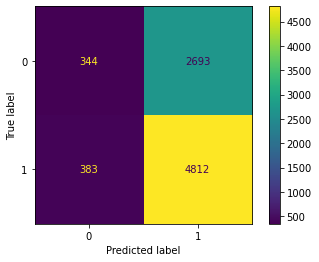

In [67]:
metrics.plot_confusion_matrix(sclf_fit, X_test, y_test)
plt.show()

F1-Score

In [68]:
print(metrics.f1_score(y_test, predictions))

0.7577952755905512


In [69]:
print('AUC on train data by stackedClassifier =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=sclf_fit.predict_proba(X_train)[:, 1]))

AUC on train data by stackedClassifier = 0.5882077572462884


In [70]:
print('AUC on test data by stackedClassifier =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=sclf_fit.predict_proba(X_test)[:, 1]))

AUC on test data by stackedClassifier = 0.5601648009487099


ROC Curve

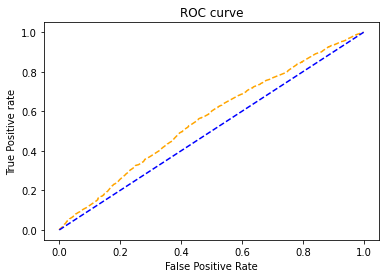

In [74]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Stacked Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.show()

KS Statistic

In [127]:
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score
def evaluate_ks_and_roc_auc(y_test, pred_prob):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_test
    df['proba'] = pred_prob[:, 1]
    
    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])
    
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc:.4f}")
    return ks.statistic, roc_auc
ks_good, auc_good = evaluate_ks_and_roc_auc(y_test, pred_prob)

KS: 0.1044 (p-value: 1.110e-15)
ROC AUC: 0.5602


model without events is not performing well , its just doing better job than a dummy classifier

ROC curve for Logistic Regression

In [75]:
lrclassifier =  LogisticRegression(class_weight="balanced", random_state = 43)

In [76]:
lrmodel= lrclassifier.fit(X_train,y_train)

In [77]:
lrpreds = lrclassifier.predict(X_test)

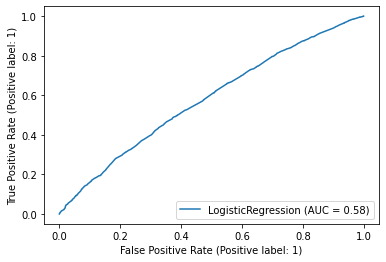

In [78]:
metrics.plot_roc_curve(lrmodel, X_test, y_test) 
plt.show()

In [79]:
rf =  RandomForestClassifier(n_estimators=60,max_depth=5,class_weight="balanced_subsample",random_state=42)

In [80]:
rfmodel = rf.fit(X_train, y_train)

In [81]:
rfpreds= rfmodel.predict(X_test)

In [82]:
print(classification_report(y_test, rfpreds))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43      3037
           1       0.67      0.67      0.67      5195

    accuracy                           0.58      8232
   macro avg       0.55      0.55      0.55      8232
weighted avg       0.58      0.58      0.58      8232



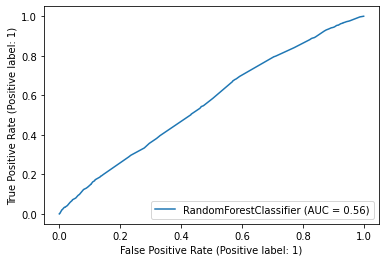

In [84]:
metrics.plot_roc_curve(rfmodel, X_test, y_test) 
plt.show()

In [85]:
import pickle
# save the model to disk
filename = 'withoutevent_finalized_model_gender.pkl'
pickle.dump(sclf_fit, open(filename, 'wb'))

Applying prediction to Test Data (50 Samples)

In [86]:
test_data.head()

,gender,train_test_flag,phone_brand_AUX,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Changhong,phone_brand_Cong,phone_brand_Coolpad,phone_brand_Daq,...,device_model_é»„é‡‘æ–—å£«Note8,device_model_é»„é‡‘æ–—å£«S8ç•…çŽ©ç‰ˆ,device_model_é»„é‡‘æ–—å£«é’æ˜¥ç‰ˆ,device_model_é”‹å°š,device_model_é”‹å°š2,device_model_é”‹å°šAir,device_model_é”‹å°šMax,device_model_é”‹å°šPro,device_model_é‡‘é’¢,device_model_é›·éœ†æˆ˜æœº
41158,M,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41159,M,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41160,F,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41161,F,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41162,M,test,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
# lets Take sample of 50 records 

test_data_gender_samples = test_data.sample(n= 50, random_state=43)

In [88]:
test_data_gender_samples.head()

,gender,train_test_flag,phone_brand_AUX,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Changhong,phone_brand_Cong,phone_brand_Coolpad,phone_brand_Daq,...,device_model_é»„é‡‘æ–—å£«Note8,device_model_é»„é‡‘æ–—å£«S8ç•…çŽ©ç‰ˆ,device_model_é»„é‡‘æ–—å£«é’æ˜¥ç‰ˆ,device_model_é”‹å°š,device_model_é”‹å°š2,device_model_é”‹å°šAir,device_model_é”‹å°šMax,device_model_é”‹å°šPro,device_model_é‡‘é’¢,device_model_é›·éœ†æˆ˜æœº
49381,M,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41265,F,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43762,F,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43766,M,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48675,M,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
test_data_gender_samples.to_csv("test_gender_data.csv", index = False)

In [90]:
import pickle

In [92]:
gender_prediction_model = pickle.load(open('withoutevent_finalized_model_gender.pkl', 'rb'))

In [93]:
gender_prediction_model

StackingCVClassifier(classifiers=[LogisticRegression(class_weight='balanced',
                                                     random_state=43),
                                  RandomForestClassifier(max_depth=7,
                                                         random_state=43)],
                     cv=5,
                     meta_classifier=XGBClassifier(base_score=None,
                                                   booster=None, callbacks=None,
                                                   colsample_bylevel=None,
                                                   colsample_bynode=None,
                                                   colsample_bytree=None,
                                                   early_stopping_rounds=None,
                                                   enable_categorical=False,
                                                   eval_...
                                                   importance_type=None,
                 

In [94]:
gender_pred = gender_prediction_model.predict(X_test)



---



---



## Age Prediction

In [293]:
dataset_train_test_features_age.head()

,phone_brand,device_model,age,train_test_flag
0,Huawei,è£è€€ç•…çŽ©4X,68,train
1,Huawei,è£è€€ç•…çŽ©4C,27,train
2,lshi,è¶…çº§æ‰‹æœº1,39,train
3,nibilu,ç«æ˜Ÿä¸€å·,25,train
4,Huawei,è£è€€3Xç•…çŽ©ç‰ˆ,22,train


In [294]:
dataset_train_test_features_age = pd.get_dummies(dataset_train_test_features_age, 
                                      columns=[ 'phone_brand','device_model'],
                                       sparse=True, dtype=float)

In [295]:
#splitting Data into Train and test set
age_train_data = dataset_train_test_features_age[dataset_train_test_features_age.train_test_flag == "train"]
age_test_data = dataset_train_test_features_age[dataset_train_test_features_age.train_test_flag == "test"]

In [296]:
age_train_data.shape

(41158, 1472)

In [297]:
age_test_data.shape

(10280, 1472)

In [298]:
age_train_data.reset_index(drop = True, inplace = True)

In [299]:
age_train_data.head()

,age,train_test_flag,phone_brand_AUX,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Changhong,phone_brand_Cong,phone_brand_Coolpad,phone_brand_Daq,...,device_model_é»„é‡‘æ–—å£«Note8,device_model_é»„é‡‘æ–—å£«S8ç•…çŽ©ç‰ˆ,device_model_é»„é‡‘æ–—å£«é’æ˜¥ç‰ˆ,device_model_é”‹å°š,device_model_é”‹å°š2,device_model_é”‹å°šAir,device_model_é”‹å°šMax,device_model_é”‹å°šPro,device_model_é‡‘é’¢,device_model_é›·éœ†æˆ˜æœº
0,68,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [300]:
train_data_age_df = age_train_data.drop(["train_test_flag"], axis = 1)

In [301]:
Y_age = train_data_age_df["age"]
X_age = train_data_age_df.drop("age",axis = 1)

In [302]:
X_age.head()

,phone_brand_AUX,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Changhong,phone_brand_Cong,phone_brand_Coolpad,phone_brand_Daq,phone_brand_Gionee,phone_brand_HTC,...,device_model_é»„é‡‘æ–—å£«Note8,device_model_é»„é‡‘æ–—å£«S8ç•…çŽ©ç‰ˆ,device_model_é»„é‡‘æ–—å£«é’æ˜¥ç‰ˆ,device_model_é”‹å°š,device_model_é”‹å°š2,device_model_é”‹å°šAir,device_model_é”‹å°šMax,device_model_é”‹å°šPro,device_model_é‡‘é’¢,device_model_é›·éœ†æˆ˜æœº
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [303]:
Y_age.head()

0    68
1    27
2    39
3    25
4    22
Name: age, dtype: int64

In [304]:
X_age.shape

(41158, 1470)

In [305]:
X_age_CSR = csr_matrix(X_age)

In [306]:
X_age_CSR.shape

(41158, 1470)

In [ ]:
#divide the dataset in to train and evaluation dataset

In [307]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_age_CSR, Y_age, test_size=0.2, random_state=40)

## Reason for Using Regression for Age Prediction

I am going to work with Regression model for predicting the Age of the customer. Reason: Predicting age as continuous value gives me opprtunity to create more age groups and focus my compaign to even more groups, moreover getiing age of the customer can also help me personalise the expreince and create Recommendation matrix On the other hand if i go ahead with classifier for Age prediction in that case , there is a chance that individuals preference might differ from overall group

#Stacking Regressor

XGboost Hyperparameter tuning

In [317]:
from sklearn.model_selection import RandomizedSearchCV

In [308]:
meta_learner_age = XGBRegressor()

In [309]:
params = {
    'min_child_weight': [1, 5],
    'gamma': [0.5, 1],
    'subsample': [0.6, 0.8],
    'max_depth': [5,7],
    'n_estimators': [100, 350],
    'learning_rate': [0.1, 0.01]
 }


In [310]:
rg_xgb = model_selection.RandomizedSearchCV(estimator=meta_learner_age,
                                       param_distributions=params,
                                       cv=3,
                                       )

In [311]:
rg_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                            

In [330]:
print(rg_xgb.best_params_)
print(rg_xgb.best_score_)
print(rg_xgb.best_estimator_)

{'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1}
0.0267754516898715
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


Stacked Regressor

In [331]:

lasso = Lasso(alpha=0.001,random_state=43)

In [333]:
rf = RandomForestRegressor(max_depth=7,random_state=43)

In [334]:
xgb_reg = XGBRegressor(gamma=1,learning_rate=0.1,max_depth=7,min_child_weight=5,n_estimators=100, subsample=0.6, random_state = 43)

stack = StackingCVRegressor(regressors=(lasso, rf), meta_regressor=xgb_reg, cv=5,  random_state=40 )

In [335]:
for clf, label in zip([lasso,rf, stack], ['Lasso', 'Random Forest', 'StackingCVRegressor']):
  scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='r2')
  print("R^2 Score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

R^2 Score: 0.03 (+/- 0.00) [Lasso]
R^2 Score: 0.02 (+/- 0.00) [Random Forest]
R^2 Score: 0.01 (+/- 0.00) [StackingCVRegressor]


In [316]:
for clf, label in zip([lasso,rf, stack], ['Lasso', 'Random Forest', 'StackingCVRegressor']):
  scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='r2')
  print("R^2 Score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

R^2 Score: 0.03 (+/- 0.00) [Lasso]
R^2 Score: 0.02 (+/- 0.00) [Random Forest]
R^2 Score: 0.01 (+/- 0.01) [StackingCVRegressor]


In [222]:
#model fit

In [336]:
sclf_age_fit = stack.fit(X_train, y_train)

In [ ]:
#predictions

In [320]:
predictions_age = sclf_age_fit.predict(X_test)

In [321]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# evaluation metrics value 

In [322]:
# R2 and RMSE Scores
r2_val = r2_score(y_test,predictions_age)
rmse_error = mean_squared_error (y_test, predictions_age, squared = False)
print ("R2 score for the model is :",r2_val )
print ("RMSE error for the model is :",rmse_error )

R2 score for the model is : 0.021647403787209973
RMSE error for the model is : 9.840093483358215


Percentage Error Distribution

In [323]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, predictions_age)

0.24108064259481532

In [324]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': predictions_age.squeeze()})
df_preds.head()

,Actual,Predicted
2603,35,30.949652
34551,37,31.837938
4367,32,31.857471
16700,31,31.088900
10448,29,30.318935


In [325]:
df_preds['Predicted'] = df_preds['Predicted'].apply(lambda x : math.ceil(x))

In [326]:
df_preds.head()

,Actual,Predicted
2603,35,31
34551,37,32
4367,32,32
16700,31,32
10448,29,31


In [327]:
df_preds["error"] = ((df_preds["Actual"] - df_preds["Predicted"])/df_preds["Actual"])*100

In [328]:
import seaborn as sns

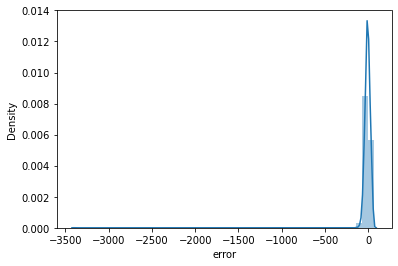

In [329]:
sns.distplot(df_preds["error"],bins=50)
plt.show()

In [ ]:
import pickle
# save the model to disk
filename = 'finalized_model_age_withoutevents.pkl'
pickle.dump(sclf_age_fit, open(filename, 'wb'))



---



---



Taking Samples of Test Data and applying model for prediction

In [205]:
age_test_data.head()

,age,train_test_flag,phone_brand_AUX,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Changhong,phone_brand_Cong,phone_brand_Coolpad,phone_brand_Daq,...,device_model_é»„é‡‘æ–—å£«Note8,device_model_é»„é‡‘æ–—å£«S8ç•…çŽ©ç‰ˆ,device_model_é»„é‡‘æ–—å£«é’æ˜¥ç‰ˆ,device_model_é”‹å°š,device_model_é”‹å°š2,device_model_é”‹å°šAir,device_model_é”‹å°šMax,device_model_é”‹å°šPro,device_model_é‡‘é’¢,device_model_é›·éœ†æˆ˜æœº
41158,52,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41159,26,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41160,56,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41161,44,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41162,45,test,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
# lets Take sample of 50 records 

age_test_samples = age_test_data.sample(n= 50, random_state=43)

In [207]:
age_test_samples.head()

,age,train_test_flag,phone_brand_AUX,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Changhong,phone_brand_Cong,phone_brand_Coolpad,phone_brand_Daq,...,device_model_é»„é‡‘æ–—å£«Note8,device_model_é»„é‡‘æ–—å£«S8ç•…çŽ©ç‰ˆ,device_model_é»„é‡‘æ–—å£«é’æ˜¥ç‰ˆ,device_model_é”‹å°š,device_model_é”‹å°š2,device_model_é”‹å°šAir,device_model_é”‹å°šMax,device_model_é”‹å°šPro,device_model_é‡‘é’¢,device_model_é›·éœ†æˆ˜æœº
49381,40,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41265,32,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43762,35,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43766,27,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48675,17,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#age_test_samples.to_csv("age_test_samples.csv", index = False)

In [208]:
dataset_train_test_features_df.head()

,phone_brand,device_model,gender,age,train_test_flag
0,Huawei,è£è€€ç•…çŽ©4X,M,68,train
1,Huawei,è£è€€ç•…çŽ©4C,M,27,train
2,lshi,è¶…çº§æ‰‹æœº1,M,39,train
3,nibilu,ç«æ˜Ÿä¸€å·,M,25,train
4,Huawei,è£è€€3Xç•…çŽ©ç‰ˆ,M,22,train


In [209]:
X_test_age = age_test_samples.drop(["train_test_flag","age"], axis = 1)

In [210]:
# converting to csr format
X_test_age_csr = csr_matrix(X_test_age)

In [211]:
X_test_age_csr.shape

(50, 1470)

In [212]:
age_pred = sclf_age_fit.predict(X_test_age_csr)

In [213]:
finalageDf_with_prediction = dataset_train_test_features_df.loc[[i for i in X_test_age.index]]

In [214]:
finalageDf_with_prediction.head()

,phone_brand,device_model,gender,age,train_test_flag
49381,lenovo,S898t,M,40,test
41265,Xiaomi,MI 3,F,32,test
43762,Xiaomi,MI 2S,F,35,test
43766,Xiaomi,å°ç±³4C,M,27,test
48675,vivo,Y622,M,17,test


In [215]:
finalageDf_with_prediction = finalageDf_with_prediction.drop(["train_test_flag","gender"],axis=1)

In [216]:
finalageDf_with_prediction['age_pred'] = age_pred

In [217]:
finalageDf_with_prediction.head()

,phone_brand,device_model,age,age_pred
49381,lenovo,S898t,40,34.527309
41265,Xiaomi,MI 3,32,29.516035
43762,Xiaomi,MI 2S,35,29.205914
43766,Xiaomi,å°ç±³4C,27,30.066885
48675,vivo,Y622,17,29.388288


In [219]:
import math

In [220]:
finalageDf_with_prediction['age_pred'] = finalageDf_with_prediction['age_pred'].apply(lambda x : math.ceil(x))

In [221]:
finalageDf_with_prediction.head()

,phone_brand,device_model,age,age_pred
49381,lenovo,S898t,40,35
41265,Xiaomi,MI 3,32,30
43762,Xiaomi,MI 2S,35,30
43766,Xiaomi,å°ç±³4C,27,31
48675,vivo,Y622,17,30


The model without event has also done a great job , however proper tuning may improve results.